In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [5]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100.0%
100.0%
100.0%
100.0%


In [6]:
# Define a simple fully-connected neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNet()
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


In [7]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Device (CPU since no GPU)
device = torch.device('cpu')
model.to(device)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [8]:
# Training function
def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')

# Train the model
train(model, train_loader, criterion, optimizer, epochs=10)

Epoch 1/10, Loss: 0.2698
Epoch 2/10, Loss: 0.1141
Epoch 3/10, Loss: 0.0811
Epoch 4/10, Loss: 0.0624
Epoch 5/10, Loss: 0.0497
Epoch 6/10, Loss: 0.0427
Epoch 7/10, Loss: 0.0344
Epoch 8/10, Loss: 0.0293
Epoch 9/10, Loss: 0.0260
Epoch 10/10, Loss: 0.0234


In [9]:
# Evaluation function
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Accuracy: {accuracy:.2f}%')
    return accuracy

# Evaluate
accuracy = evaluate(model, test_loader)
if accuracy > 95:
    print("Achieved >95% accuracy!")
else:
    print("Need more training or tuning.")

Accuracy: 97.91%
Achieved >95% accuracy!


Predictions on first 5 test samples:
Sample 1: True label = 7, Predicted = 7
Sample 2: True label = 2, Predicted = 2
Sample 3: True label = 1, Predicted = 1
Sample 4: True label = 0, Predicted = 0
Sample 5: True label = 4, Predicted = 4


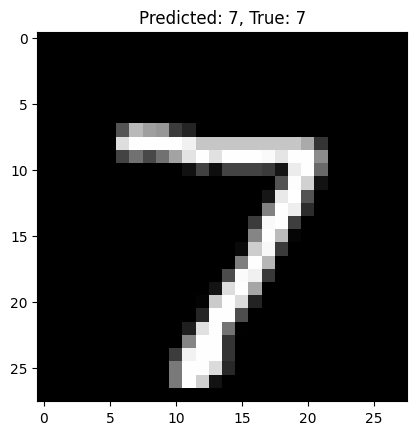

In [13]:
# Examine model predictions on a few samples
import numpy as np

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Move to device
images, labels = images.to(device), labels.to(device)

# Get model predictions
model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Show predictions for first 5 samples
print("Predictions on first 5 test samples:")
for i in range(5):
    print(f"Sample {i+1}: True label = {labels[i].item()}, Predicted = {predicted[i].item()}")

# Visualize one sample
plt.imshow(images[0].cpu().squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted[0].item()}, True: {labels[0].item()}")
plt.show()